# #Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1.	Pre-process the dataset.
2.	Identify outliers.
3.	Check the correlation.
4.	Implement linear regression and random forest regression models.
5.	Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
df = pd.read_csv("uber.csv")

##  1.	Pre-process the dataset.

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194.0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199.0,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355.0,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730.0,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152.0,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.shape #To get the total (Rows,Columns)

(200000, 10)

In [ ]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         11 non-null      float64
 1   Unnamed: 1         200000 non-null  int64  
 2   key                200000 non-null  object 
 3   fare_amount        200000 non-null  float64
 4   pickup_datetime    200000 non-null  object 
 5   pickup_longitude   200000 non-null  float64
 6   pickup_latitude    200000 non-null  float64
 7   dropoff_longitude  199999 non-null  float64
 8   dropoff_latitude   199999 non-null  float64
 9   passenger_count    200000 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 15.3+ MB


In [ ]:
df.describe()

,Unnamed: 0,Unnamed: 1,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.100000e+01,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,3.150848e+07,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.602404e+07,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,2.205147e+06,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,2.092417e+07,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.783520e+07,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.472760e+07,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.061106e+07,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'Unnamed: 1', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0','Unnamed: 1', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [ ]:
df.describe() #To get statistics of each columns 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### Filling Missing values

In [ ]:
df.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df.isnull().sum().sum()

2

In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [ ]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce',utc=True) 

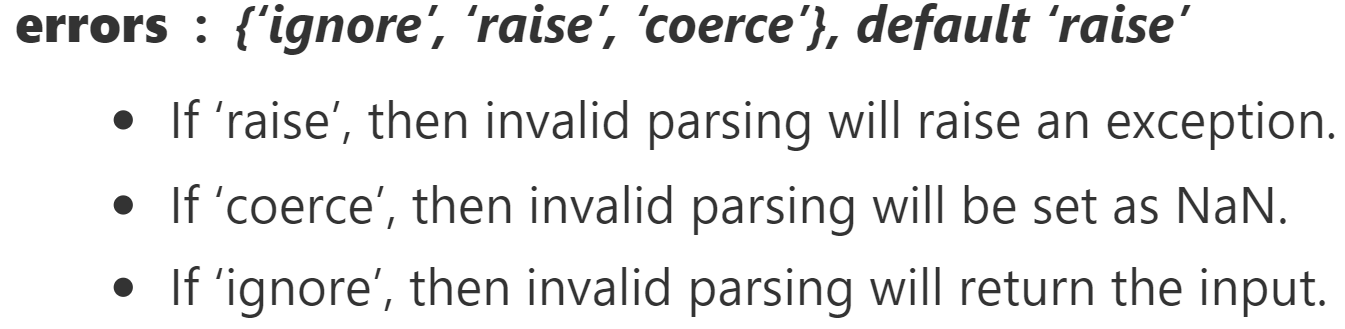

In [ ]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


### To segregate each time of date and time

In [ ]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek,
            dayName = df.pickup_datetime.dt.day_name()
              )

#**OR**

In [ ]:
# Only series datatype has the dt attribute
df['hour'] = df.pickup_datetime.dt.hour
df['day']= df["pickup_datetime"].dt.day  # is a series
df['month'] = df.pickup_datetime.dt.month # is a series 
df['year'] = df.pickup_datetime.dt.year
df['dayofweek'] = df.pickup_datetime.dt.dayofweek

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dayName
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,Thursday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,Friday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,Monday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,Friday
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,Thursday


In [ ]:
df.describe() # only for quantitative columns

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525299,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [ ]:
x=df['fare_amount'].value_counts()  # list(Series) # counts are sorted in descending order ie. 1st count is max count

In [ ]:
print(type(x))
print("Max count = ",x[6.50])
x


<class 'pandas.core.series.Series'>
Max count =  9684


6.50     9684
4.50     8247
8.50     7521
5.70     5858
5.30     5838
         ... 
60.04       1
73.25       1
69.90       1
25.94       1
89.10       1
Name: fare_amount, Length: 1240, dtype: int64

In [ ]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime',axis=1)


In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dayName
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,Friday
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,Monday
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,Friday
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,Thursday


In [ ]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dayName               object
dtype: object

In [ ]:
df.drop(["dayName"],axis=1,inplace=True)

## Checking outliers and filling them 

In [ ]:
number_of_columns = len(df.columns)

In [ ]:
number_of_columns

11

##Number of columns is 12 (11 quntitative and 1 categoraical) , but in the following box plots only 11 subplots are visible. This is because boxplots are only for quantitative valued columns and not for categoraical valued columns

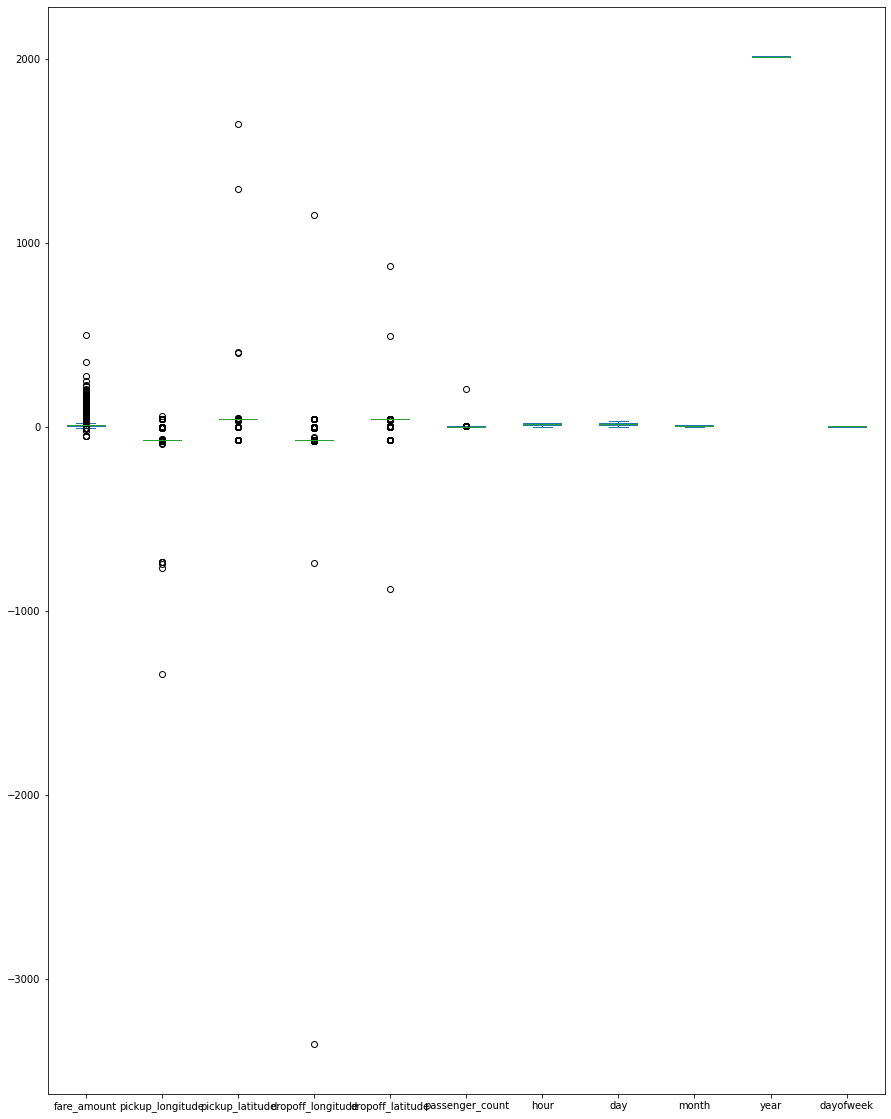

In [ ]:
df.plot(kind = "box",subplots = False,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

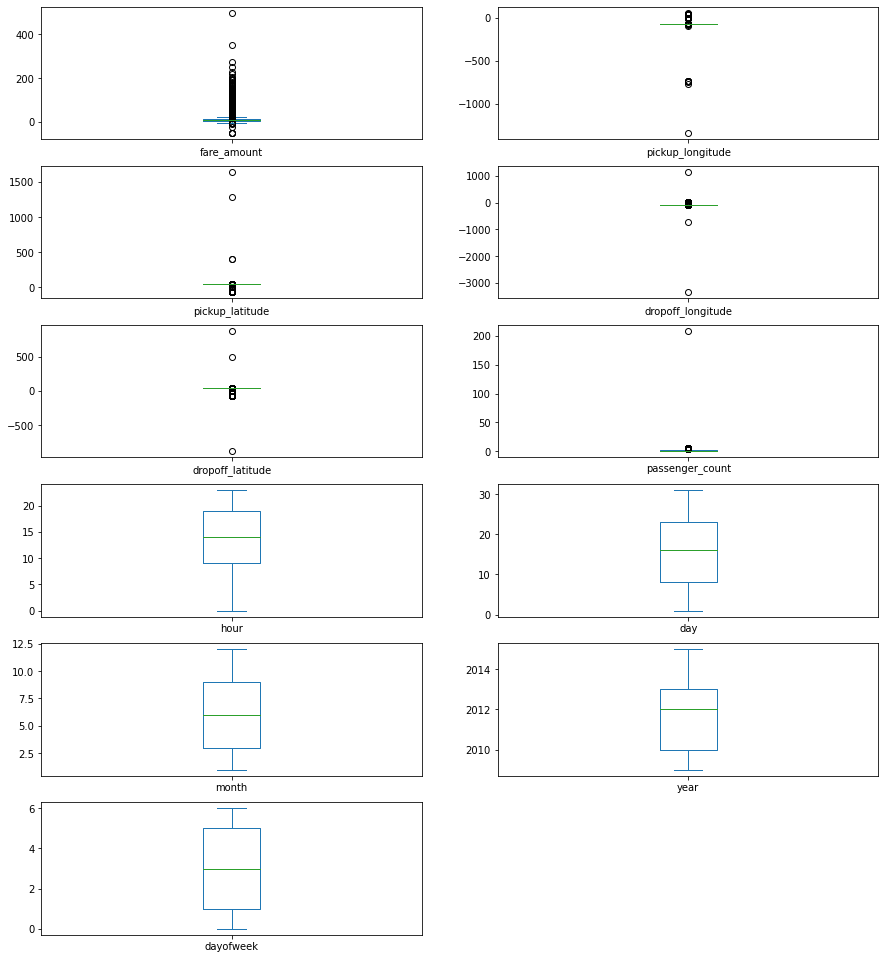

In [ ]:
# df.plot(kind = "box", subplots = True, layout = (5,2), figsize=(15,20)) # 5 rows x 2 columns = 10 spaces for 10 subplots ; where 10 subplots are possible and 11 > 10 : not OK : gives error
df.plot(kind = "box", subplots = True, layout = (7,2), figsize=(15,20)) # 7 rows x 2 columns = 14 spaces for 14 subplots ; where 14 subplots are possible and 11 < 14 : OK


fare_amount              AxesSubplot(0.125,0.71587;0.227941x0.16413)
pickup_longitude      AxesSubplot(0.398529,0.71587;0.227941x0.16413)
pickup_latitude       AxesSubplot(0.672059,0.71587;0.227941x0.16413)
dropoff_longitude       AxesSubplot(0.125,0.518913;0.227941x0.16413)
dropoff_latitude     AxesSubplot(0.398529,0.518913;0.227941x0.16413)
passenger_count      AxesSubplot(0.672059,0.518913;0.227941x0.16413)
hour                    AxesSubplot(0.125,0.321957;0.227941x0.16413)
day                  AxesSubplot(0.398529,0.321957;0.227941x0.16413)
month                AxesSubplot(0.672059,0.321957;0.227941x0.16413)
year                       AxesSubplot(0.125,0.125;0.227941x0.16413)
dayofweek               AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

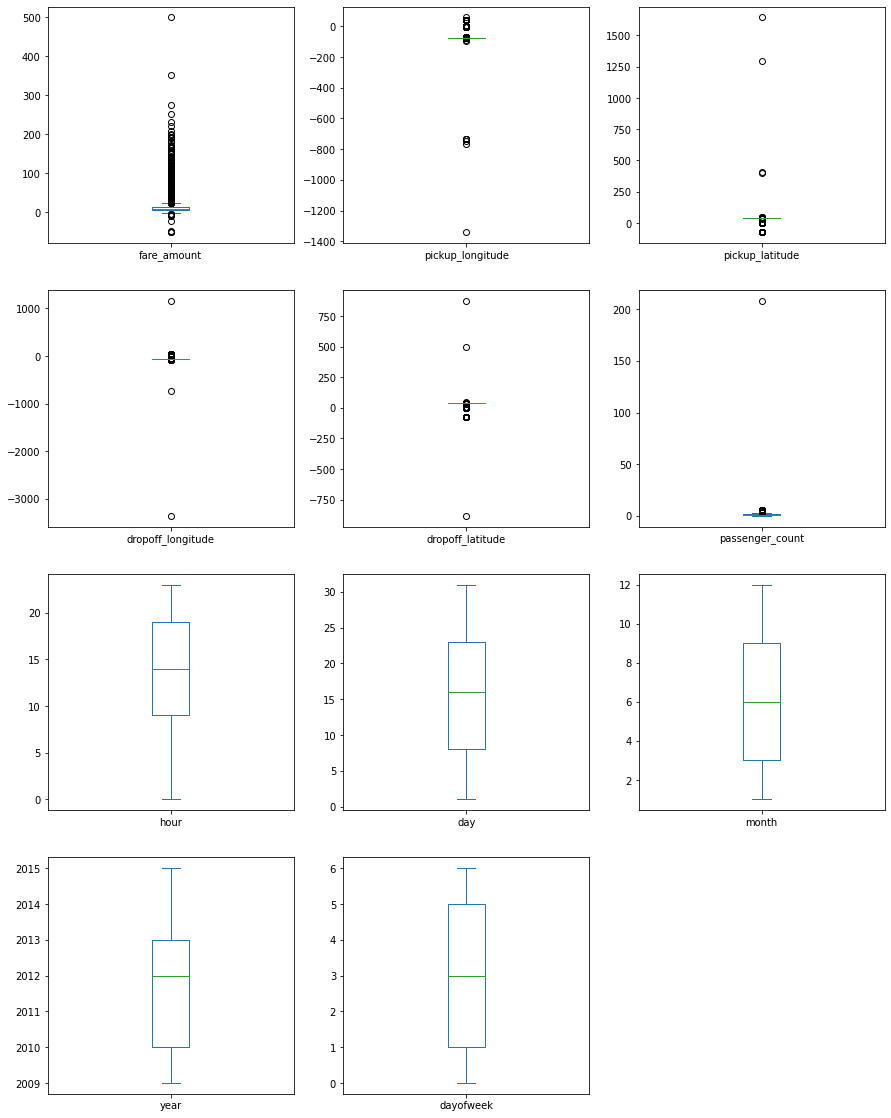

In [ ]:
df.plot(kind = "box", subplots = True, layout = (4,3), figsize=(15,20)) # 4 rows x 3 columns = 12 spaces for 12 subplots ; where 11 subplots are possible and 11 < 12 : OK

###CONCLUSION : Number of spaces for subplots generated can be >= actual number of subplots (of the quantitative columns) but not < the actual number of subplots

###Explanation of clip function

In [ ]:
a  = np.arange(10,100,10) # considers from 10 to 99 with step size of 10
a1 = np.clip(a,30,60)    # np.clip(list, lowerlimit, upper limit)

print("Before clipping :",a )
print(" After clipping :",a1)

Before clipping : [10 20 30 40 50 60 70 80 90]
 After clipping : [30 30 30 40 50 60 60 60 60]


In [ ]:
# Elimination of the outliers

# Using the InterQuartile Range to fill the values 

def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q2 = df1[col].quantile(0.50)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    print("-----*******************************************-----")
    print("col=",col,"Q1=",Q1,"Q2=",Q2,"Q3=",Q3)
    print("-----*******************************************-----")
    df1[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    print("col_list",col_list)
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

In [ ]:
df = treat_outliers_all(df , df.columns)

col_list Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')
-----*******************************************-----
col= fare_amount Q1= 6.0 Q2= 8.5 Q3= 12.5
-----*******************************************-----
-----*******************************************-----
col= pickup_longitude Q1= -73.992065 Q2= -73.981823 Q3= -73.9671535
-----*******************************************-----
-----*******************************************-----
col= pickup_latitude Q1= 40.73479575 Q2= 40.752592 Q3= 40.767158
-----*******************************************-----
-----*******************************************-----
col= dropoff_longitude Q1= -73.991407 Q2= -73.980093 Q3= -73.96365875000001
-----*******************************************-----
-----*******************************************-----
col= dropoff_latitude Q1= 40.733823 Q2= 40.753042 Q

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

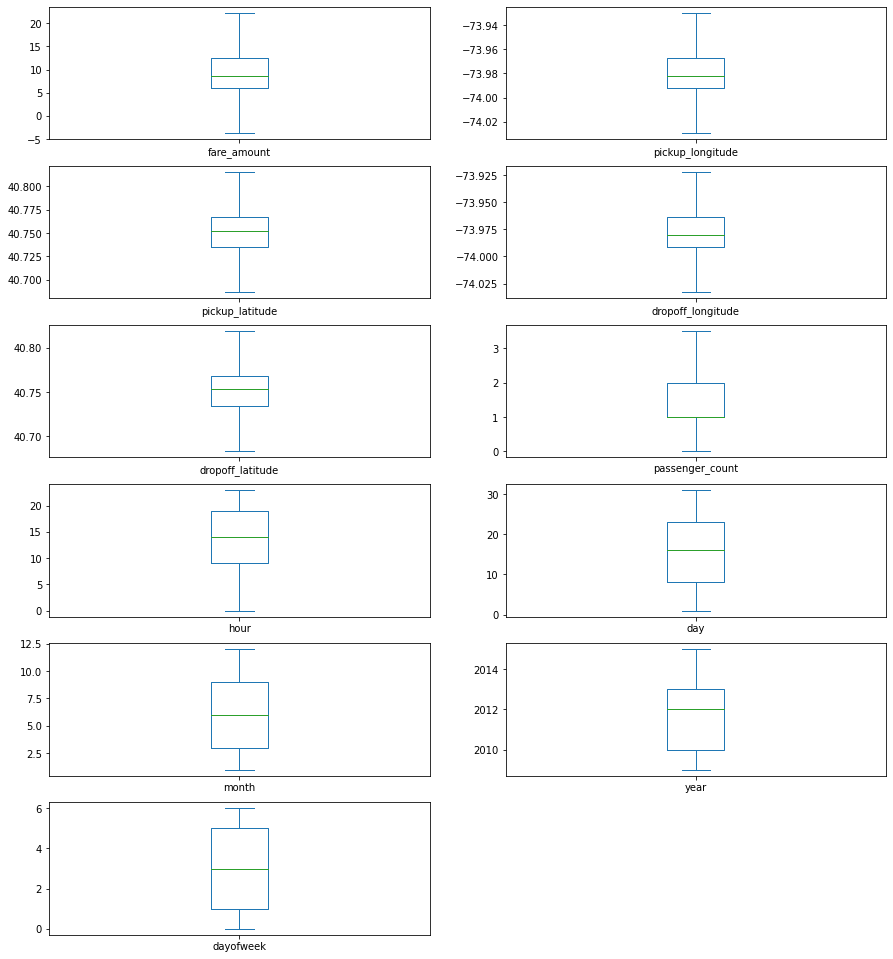

In [ ]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [ ]:
#Finding inccorect latitude (Less than -90 or greater than 90) and longitude (greater than 180 or less than -180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                   
                                    ]

In [ ]:
incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek


In [ ]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [ ]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4
199997,22.25,-73.986017,40.756487,-73.922036,40.692588,2.0,0,29,6,2009,0
199998,14.50,-73.997124,40.725452,-73.983215,40.695416,1.0,14,20,5,2015,2


In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import haversine as hs  #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)
    
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [ ]:
#Uber doesn't travel over 130 kms so minimize the distance 
df= df[(df.dist_travel_km >= 1) & (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (163040, 12)


In [ ]:
bool_df = df.isnull()
bool_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,False,False,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,False,False


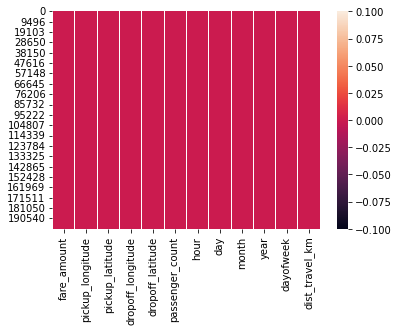

In [ ]:
sns.heatmap(bool_df) #Free of null values , no correlation exists since r = 0 (False is a constant value which is not related to the index of each row in the df)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


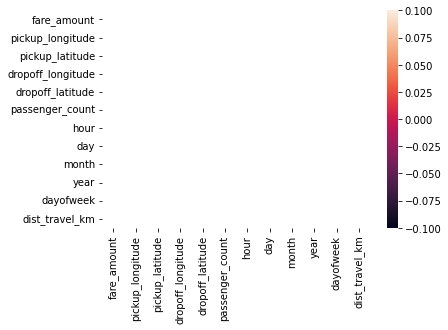

In [ ]:
sns.heatmap(bool_df.corr())

In [ ]:
corr = df.corr() #Function to find the correlation

In [ ]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.193177,-0.119469,0.258583,-0.137745,0.015056,-0.029760,0.001607,0.031339,0.161861,0.009264,0.798926
pickup_longitude,0.193177,1.000000,0.425309,0.241569,0.169203,-0.012892,0.013057,-0.004459,0.000863,0.014862,-0.028392,0.130003
pickup_latitude,-0.119469,0.425309,1.000000,0.148761,0.358836,-0.016186,0.031484,0.002907,0.001627,-0.016172,-0.044618,-0.143530
dropoff_longitude,0.258583,0.241569,0.148761,1.000000,0.401751,-0.008642,-0.059704,-0.005886,0.002400,0.015646,-0.002147,0.247210
dropoff_latitude,-0.137745,0.169203,0.358836,0.401751,1.000000,-0.007419,0.019775,-0.000130,-0.001663,-0.010472,-0.031153,-0.111577
passenger_count,0.015056,-0.012892,-0.016186,-0.008642,-0.007419,1.000000,0.020203,0.002730,0.009936,-0.007765,0.047728,0.007754
hour,-0.029760,0.013057,0.031484,-0.059704,0.019775,0.020203,1.000000,0.005447,-0.002887,0.002574,-0.090975,-0.047251
day,0.001607,-0.004459,0.002907,-0.005886,-0.000130,0.002730,0.005447,1.000000,-0.017113,-0.011725,0.005673,0.001019
month,0.031339,0.000863,0.001627,0.002400,-0.001663,0.009936,-0.002887,-0.017113,1.000000,-0.113429,-0.010483,0.008433
year,0.161861,0.014862,-0.016172,0.015646,-0.010472,-0.007765,0.002574,-0.011725,-0.113429,1.000000,0.006522,0.020138


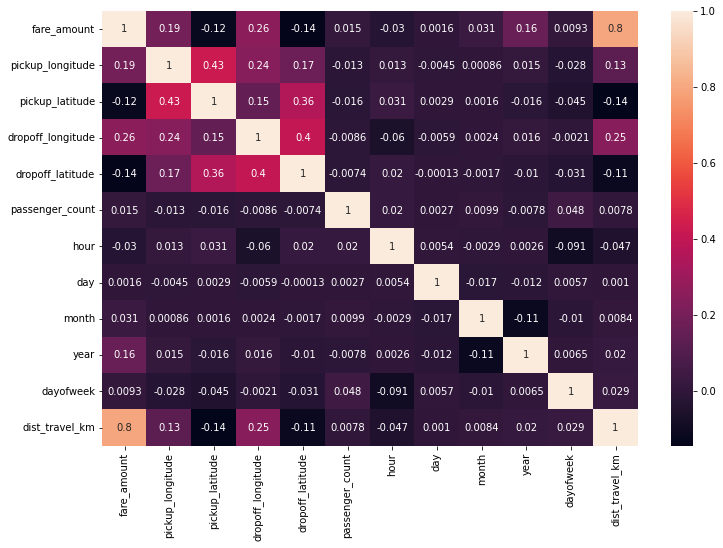

In [ ]:
plt.subplots(figsize = (12,8))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

### Dividing the dataset into feature and target values 

In [ ]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_travel_km'],
      dtype='object')

In [ ]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

###OR, since all columns except "fare_amount" are the features, the following can be done instead 

In [ ]:
x = df[df.columns[1:]] # since 0th column is fare_amount
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088
...,...,...,...,...,...,...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1.0,14,31,1,2014,4,1.122879
199996,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875053
199997,-73.986017,40.756487,-73.922036,40.692588,2.0,0,29,6,2009,0,8.919323
199998,-73.997124,40.725452,-73.983215,40.695416,1.0,14,20,5,2015,2,3.539720


In [ ]:
y = df['fare_amount']
y

0          7.50
1          7.70
2         12.90
3          5.30
4         16.00
          ...  
199994    12.00
199996     7.50
199997    22.25
199998    14.50
199999    14.10
Name: fare_amount, Length: 163040, dtype: float64

### Dividing the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.70,random_state=7) # 30% for training, 70% for testing / evaluation

In [ ]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
85111,-73.979022,40.777218,-74.006340,40.739864,3.0,21,27,11,2010,5,4.748305
134870,-74.001322,40.731158,-74.008248,40.743092,1.0,16,7,5,2013,1,1.449640
82644,-73.985282,40.751895,-73.977094,40.765192,3.0,14,3,1,2009,5,1.631489
110503,-73.965110,40.764404,-73.972360,40.753432,1.0,16,18,10,2010,0,1.364317
95194,-73.988655,40.737095,-74.003300,40.732762,1.0,20,25,2,2013,0,1.324667
...,...,...,...,...,...,...,...,...,...,...,...
81555,-73.983937,40.773500,-73.996047,40.750557,3.5,18,21,9,2013,5,2.747475
65586,-73.929786,40.773702,-73.922036,40.692712,3.5,19,20,9,2011,1,9.029333
13187,-73.971954,40.782089,-73.957771,40.774437,3.5,1,19,4,2015,6,1.466365
60932,-73.968068,40.799880,-73.984100,40.749037,3.5,14,18,12,2010,5,5.812440


In [ ]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
4601,-73.980368,40.745082,-73.965373,40.756930,3.5,23,16,5,2011,0,1.825137
16992,-73.971989,40.750650,-73.922036,40.722312,2.0,0,14,2,2011,0,5.257621
22135,-73.988637,40.737163,-73.990168,40.748987,2.0,12,6,12,2011,1,1.321082
143093,-73.979542,40.781737,-73.982103,40.752105,2.0,9,25,8,2010,2,3.301984
42087,-74.000102,40.761207,-73.991612,40.751532,1.0,7,23,12,2010,3,1.291802
...,...,...,...,...,...,...,...,...,...,...,...
43618,-73.979320,40.749995,-74.033029,40.687721,1.0,14,15,12,2009,1,8.272751
14485,-73.950343,40.783722,-73.968238,40.796972,1.0,8,6,1,2013,6,2.107203
154067,-74.003772,40.748191,-73.966122,40.768755,1.0,16,13,5,2009,2,3.909568
26162,-73.983575,40.765592,-73.983882,40.780910,1.0,17,30,10,2013,2,1.703482


In [ ]:
y_train

85111     10.1
134870     6.5
82644      4.9
110503     5.7
95194      7.0
          ... 
81555      8.5
65586     19.7
13187      5.5
60932     17.3
75614      9.0
Name: fare_amount, Length: 48912, dtype: float64

In [ ]:
y_test

4601       6.50
16992     22.25
22135      7.30
143093    12.10
42087      5.30
          ...  
43618     22.25
14485      8.00
154067    10.50
26162      9.00
175834    10.90
Name: fare_amount, Length: 114128, dtype: float64

In [ ]:
len(y) # 100% of entries or examples

163040

In [ ]:
len(y_train) # 30% for training

48912

In [ ]:
len(y_test) # 70% for testing

114128

In [ ]:
len(y_train) + len(y_test) # total becomes 100%

163040

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression.intercept_ #To find the linear intercept

3802.528263637297

In [ ]:
regression.coef_ #To find the linear coefficients ie parameters (11 features so 11 parameters) 

array([ 2.73957382e+01, -7.30933936e+00,  2.19325833e+01, -1.73267460e+01,
        5.93910490e-02,  9.70449341e-03,  5.11074145e-03,  6.52947004e-02,
        4.25071043e-01, -3.72182062e-02,  1.79572435e+00])

In [ ]:
for i in range(0,len(regression.coef_)):
    print("theta",i,"=",regression.coef_[i])

theta 0 = 27.395738152913314
theta 1 = -7.309339363351481
theta 2 = 21.932583310900334
theta 3 = -17.326745981989458
theta 4 = 0.05939104898960823
theta 5 = 0.00970449341093338
theta 6 = 0.005110741454381507
theta 7 = 0.06529470037185393
theta 8 = 0.42507104258988027
theta 9 = -0.037218206220201666
theta 10 = 1.7957243491136623


In [ ]:
y_pred = regression.predict(X_test) #To predict the target values

In [ ]:
comparison = pd.DataFrame({"Actual Label":y_test,"Predicted Label":y_pred})

In [ ]:
comparison

,Actual Label,Predicted Label
4601,6.50,8.459790
16992,22.25,15.844342
22135,7.30,7.152703
143093,12.10,10.100598
42087,5.30,6.013980
...,...,...
43618,22.25,19.074789
14485,8.00,8.770294
154067,10.50,10.161324
26162,9.00,8.149139


In [ ]:
comparison.reset_index()

,index,Actual Label,Predicted Label
0,4601,6.50,8.459790
1,16992,22.25,15.844342
2,22135,7.30,7.152703
3,143093,12.10,10.100598
4,42087,5.30,6.013980
...,...,...,...
114123,43618,22.25,19.074789
114124,14485,8.00,8.770294
114125,154067,10.50,10.161324
114126,26162,9.00,8.149139


In [ ]:
comparison.reset_index().drop(["index"],axis=1)

,Actual Label,Predicted Label
0,6.50,8.459790
1,22.25,15.844342
2,7.30,7.152703
3,12.10,10.100598
4,5.30,6.013980
...,...,...
114123,22.25,19.074789
114124,8.00,8.770294
114125,10.50,10.161324
114126,9.00,8.149139


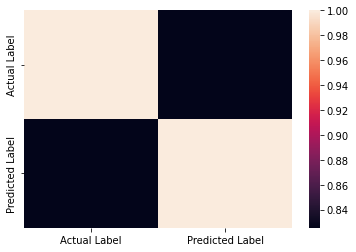

In [ ]:
sns.heatmap(comparison.corr())

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
r2_score(y_test,y_pred)

0.681258008592803

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test,y_pred)

In [ ]:
MSE 

9.123097906212148

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

3.0204466401862073

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([ 6.247 , 21.9252,  7.0775, ..., 10.802 ,  7.395 , 11.381 ])

### Metrics evaluation for Random Forest

In [ ]:
R2_Random = r2_score(y_test,y_pred)

In [ ]:
R2_Random

0.8203890195188834

In [ ]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [ ]:
MSE_Random

5.140861901269363

In [ ]:
RMSE_Random = np.sqrt(MSE_Random)

In [ ]:
RMSE_Random

2.2673468859593062